# CLASS IMBALANCE PROBLEM

### Class Imbalance Problme

> 각 클래스의 개수비가 현저히 차이나는 것  
    - Fraud detection, medical diagnosis, anomaly detection 등에서 주로 생기는 문제
  
크게 **두가지 접근 방법** 으로 해결
- **Cost function based approach** : rare class에 가중치를 더 주거나, rare class를 잘못 분류 했을 때 cost,loss,param을 조정  
- **Sampling based approach** : 데이터 자체를 늘리고 줄이는 방법  ex) upsampling, downsampling, SMOTE

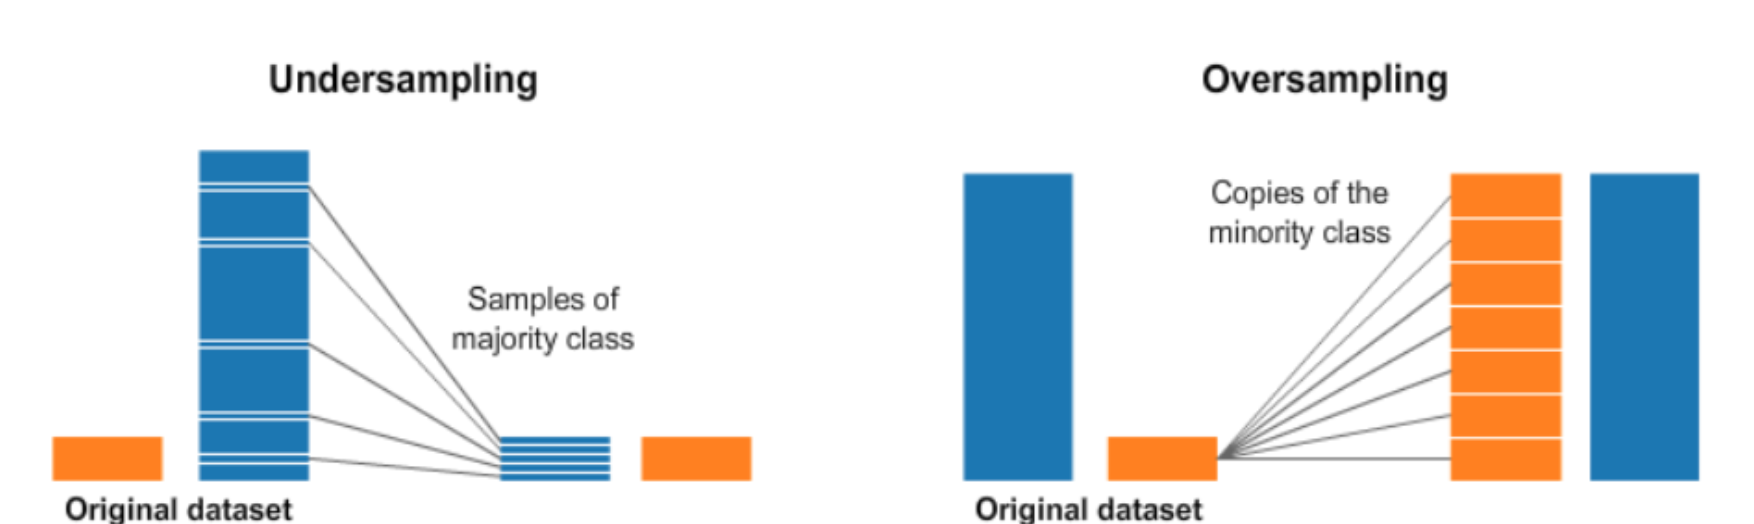

그 외에 repitition, bootstraping 등의 방법이 있다.  
- **서로 다른 데이터 셋으로 앙상블하기**  
> 가장 간단하고 쉬운 방법.  
rare class에 맞게 abundant class를 n개로 나눈 뒤, 각각 abundant class와 rare class를 합쳐, n번의 모델 학습 후, 결과를 합치거나 평균을 낸다.  
- **clustering 하여 rare class 학습하기**  
> clustering을 통해, abundant class를 r 개의 group으로 clustering 하는 것을 제안.  
class의 개수를 r로 하고 각 그룹에 대해 medoid(center of cluster)에 유지, 모델 학습 시, rare class와 medoid로 학습.  
- **딥러닝을 이용한 학습과 class 가중치 주기**  
> 소수 클래스에서 정답을 맞추지 못한 경우, loss에 패널티를 주어 학습 시킴.  
> auc를 최적화하는 방향으로 학습 가능.

## SMOTE(Synthetic Minority Over-sampling Technique)  
  
적은 비율의 클래스 데이터를 최근접 이웃을 이용해 생성한다.  
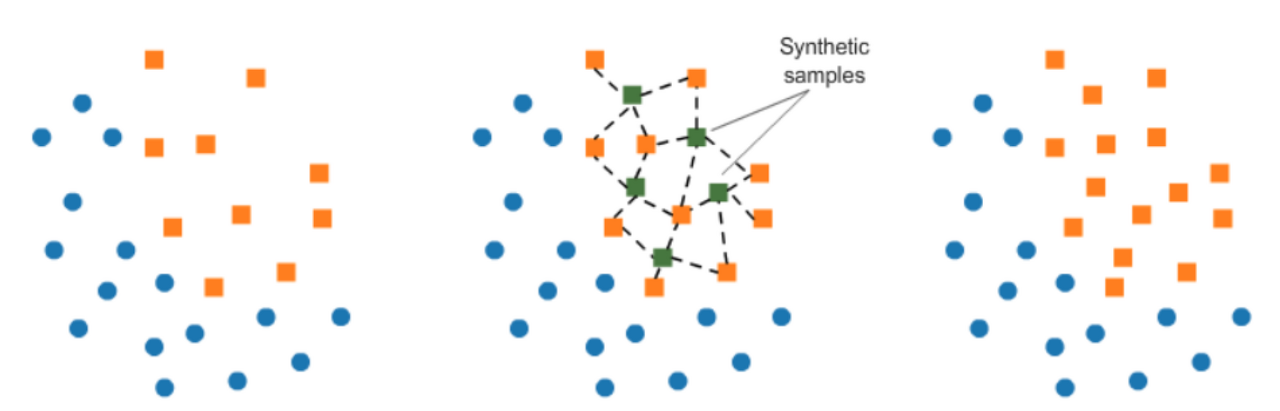
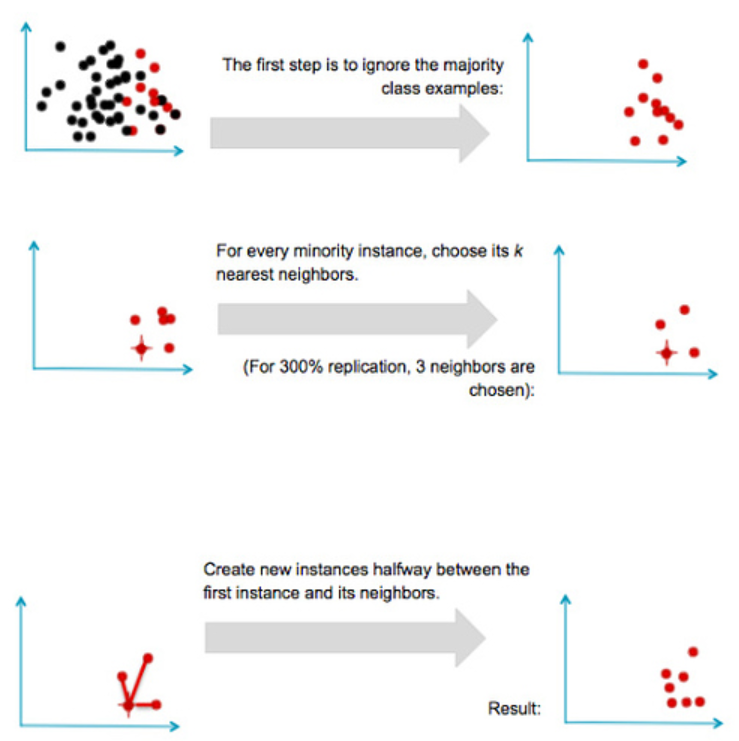

In [1]:
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where

In [7]:
# define dataset
X, y = make_classification(n_samples=10000, n_features = 2, n_redundant = 0,
                          n_clusters_per_class = 1, weights = [0.99], flip_y=0, random_state=1)

# summarize class distribution
counter = Counter(y)
print(counter)

Counter({0: 9900, 1: 100})


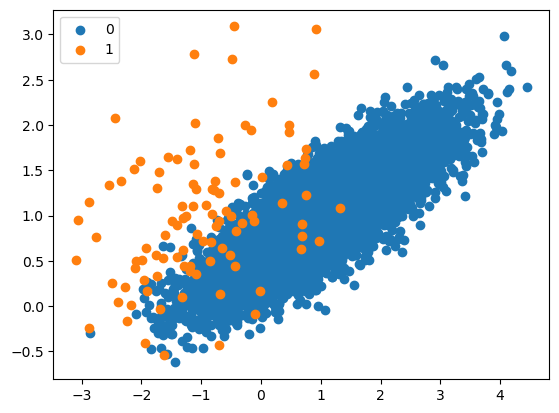

In [3]:
# scatter plot of examples by class label
for label , _ in counter.items():
    row_ix = where(y==label)[0]
    pyplot.scatter(X[row_ix,0], X[row_ix,1], label=str(label))
pyplot.legend()
pyplot.show()

In [8]:
#!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

# transform the dataset
oversample = SMOTE()
X,y = oversample.fit_resample(X,y)
# summarize the new class distribution
new_counter = Counter(y)
print(counter)
print(new_counter)

Counter({0: 9900, 1: 100})
Counter({0: 9900, 1: 9900})


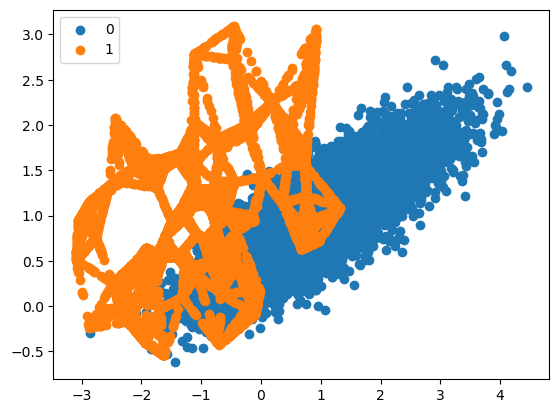

In [9]:
for label, _ in counter.items():
    row_ix = where(y==label)[0]
    pyplot.scatter(X[row_ix,0], X[row_ix,1], label=str(label))
pyplot.legend()
pyplot.show()

## SMOTE for Classification

In [15]:
# decision tree evaluated on imbalanced dataset
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier

# define dataset
X,y = make_classification(n_samples = 10000, n_features=2, n_redundant=0,
                         n_clusters_per_class = 1, weights=[0.99], flip_y=0, random_state=1)
# define model
model = DecisionTreeClassifier()
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv)
print('Mean ROC AUC: %.3f'% mean(scores))

Mean ROC AUC: 0.768


In [16]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

# define pipeline
steps = [('over', SMOTE()),('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)

# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring = 'roc_auc', cv=cv)
print('Mean ROC AUC : %.3f' % mean(scores))

Mean ROC AUC : 0.824


In [21]:
# Oversample with SMOTE and random undersample for imbalanced dataset
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from matplotlib import pyplot
from numpy import where

# define dataset
X, y = make_classification(n_samples = 10000, n_features = 2, n_redundant=0,
                          n_clusters_per_class = 1, weights=[0.99], flip_y=0, random_state=1)
# summarize class distribution
counter = Counter(y)
print(counter)

# define pipeline
model = DecisionTreeClassifier()
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o',over),('u', under),('model', model)]
pipeline = Pipeline(steps=steps)

# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring = 'roc_auc', cv=cv)
print('Mean ROC AUC : %.3f' % mean(scores))

Counter({0: 9900, 1: 100})
Mean ROC AUC : 0.836


Counter({0: 9900, 1: 100})
Counter({0: 1980, 1: 990})


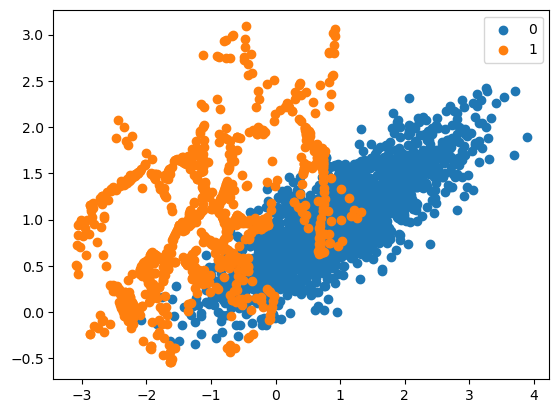

In [20]:
# define dataset
X, y = make_classification(n_samples = 10000, n_features = 2, n_redundant=0,
                          n_clusters_per_class = 1, weights=[0.99], flip_y=0, random_state=1)
# summarize class distribution
counter = Counter(y)
print(counter)

# define pipeline
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o',over),('u', under)]
pipeline = Pipeline(steps=steps)

# transform the dataset
X,y = pipeline.fit_resample(X,y)

# summarize the new class distribution
counter = Counter(y)
print(counter)

# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = where(y==label)[0]
    pyplot.scatter(X[row_ix,0], X[row_ix,1], label=str(label))
pyplot.legend()
pyplot.show()

In [22]:
## grid search k value for SMOTE oversampling for imbalanced classification

# defind dataset
X, y = make_classification(n_samples = 10000, n_features = 2, n_redundant = 0, 
                           n_clusters_per_class = 1, weights=[0.99], flip_y=0, random_state=1)

# values to evaluate
k_values=[1,2,3,4,5,6,7]
for k in k_values:
    # define pipeline
    model = DecisionTreeClassifier()
    over = SMOTE(sampling_strategy=0.1, k_neighbors=k)
    under = RandomUnderSampler(sampling_strategy=0.5)
    steps = [('over',over), ('under',under),('model', model)]
    pipeline = Pipeline(steps=steps)
    # evaluate pipeline
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv = cv)
    score = mean(scores)
    print('> k %d, Mean ROC AUC : % .3f' % (k, score))

> k 1, Mean ROC AUC :  0.837
> k 2, Mean ROC AUC :  0.852
> k 3, Mean ROC AUC :  0.839
> k 4, Mean ROC AUC :  0.839
> k 5, Mean ROC AUC :  0.848
> k 6, Mean ROC AUC :  0.845
> k 7, Mean ROC AUC :  0.846
